In [8]:
# Helpful docs : https://huggingface.co/datasets/openclimatefix/uk_pv

In [9]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [20]:
metadata_df = pd.read_csv('../data/uk_pv/metadata.csv')

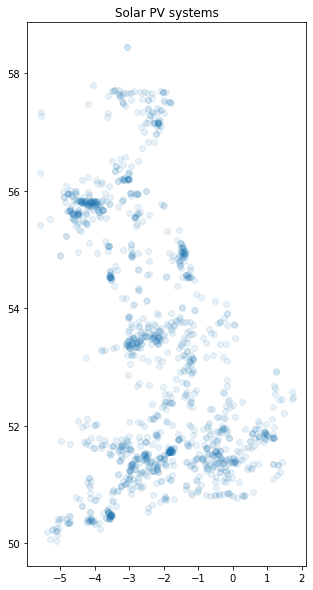

In [19]:
fig, ax = plt.subplots(figsize=(5,10))
ax.scatter(metadata_df.longitude_rounded, metadata_df.latitude_rounded, alpha=0.1)
plt.title("Solar PV systems");
#plt.savefig('images/pv_sites.jpg')

In [7]:
# PV sites for which there are readings

pv_power = xr.open_dataset("../data/uk_pv/pv.netcdf", engine="h5netcdf")


In [13]:
ss_ids_with_readings = np.array(pv_power.data_vars)
ss_ids_with_readings = ss_ids_with_readings.astype(int)


print('How many SS have readings? ', len(ss_ids_with_readings))
print('How many PVs do we have metadata for? ', metadata_df.shape[0])

How many SS have readings?  1311
How many PVs do we have metadata for?  24662


In [14]:
metadata_df_with_readings = metadata_df[metadata_df['ss_id'].isin(ss_ids_with_readings)]
metadata_df_with_readings.head()

,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at
198,2603,51.70,-4.71,W01000610,210.0,32.0,3.96,2012-04-02
202,2607,52.44,-0.12,E01018211,200.0,35.0,2.94,2011-08-25
220,2625,50.38,-4.22,E01033294,190.0,38.0,2.35,2011-08-23
221,2626,54.99,-3.18,S00097762,270.0,22.0,3.60,2011-08-18
223,2628,50.99,-1.37,E01022706,225.0,34.0,1.38,2011-09-20


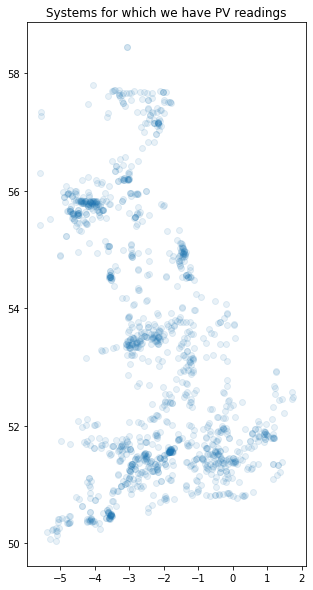

In [15]:
fig, ax = plt.subplots(figsize=(5,10))
ax.scatter(metadata_df_with_readings.longitude_rounded, metadata_df_with_readings.latitude_rounded, alpha=0.1)
plt.title("Systems for which we have PV readings");

Number of systems in crop : 7


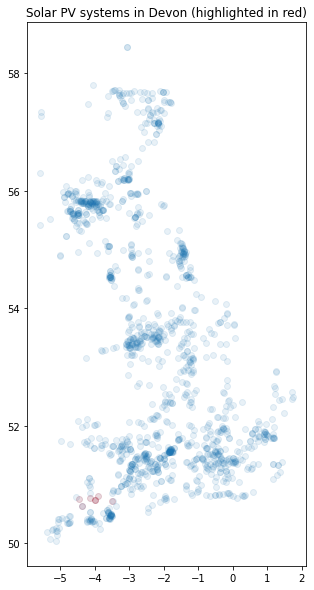

In [16]:
# Find some systems in Devon for which we actually have readings 

metadata_df = metadata_df_with_readings

longitude_cond = (metadata_df.longitude_rounded <= -3.5) & (metadata_df.longitude_rounded >= -4.5)
latitude_cond = (metadata_df.latitude_rounded <= 50.84) & (metadata_df.latitude_rounded >= 50.64)

devon_df = metadata_df[ (longitude_cond) &(latitude_cond)]
print('Number of systems in crop :', devon_df.shape[0])

fig, ax = plt.subplots(figsize=(5,10))
ax.scatter(metadata_df.longitude_rounded, metadata_df.latitude_rounded, alpha=0.1)
ax.scatter(devon_df.longitude_rounded, devon_df.latitude_rounded, alpha=0.1, color='red', label=devon_df.ss_id)

plt.title("Solar PV systems in Devon (highlighted in red)");

In [21]:
# the 7 systems in Devon

devon_df

,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at
3039,5444,50.72,-3.50,E01019988,180.0,35.0,2.09,2012-05-18
4216,6621,50.80,-3.90,E01020326,180.0,30.0,3.99,2012-09-20
4430,6835,50.74,-4.00,E01020330,270.0,40.0,3.99,2012-10-10
4754,7159,50.64,-4.36,E01018949,160.0,32.0,3.92,2013-02-07
4840,7245,50.74,-4.01,E01020329,135.0,45.0,4.00,2013-02-18
4871,7276,50.77,-4.13,E01020322,180.0,30.0,3.92,2013-03-01
5358,7763,50.76,-4.46,E01018974,186.0,5.0,4.00,2013-08-21


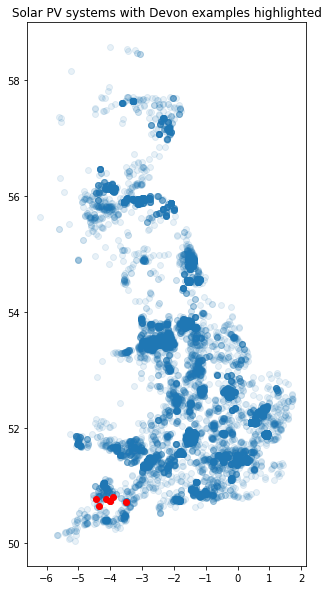

In [32]:
#example_pvs = metadata_df[(metadata_df.ss_id == 20984) | (metadata_df.ss_id == 21832) | (metadata_df.ss_id == 6848)]

fig, ax = plt.subplots(figsize=(5,10))
ax.scatter(metadata_df.longitude_rounded, metadata_df.latitude_rounded, alpha=0.1)
ax.scatter(devon_df.longitude_rounded, devon_df.latitude_rounded, color='red')
plt.title("Solar PV systems with Devon examples highlighted");
plt.savefig('devon_pv_sites.jpg')

In [ ]:
pv_power = xr.open_dataset("../data/uk_pv/pv.netcdf", engine="h5netcdf")

In [34]:
devon_ss_ids = devon_df.ss_id[:].values
devon_ss_ids

array([5444, 6621, 6835, 7159, 7245, 7276, 7763])

In [25]:
len(devon_ss_ids)

7

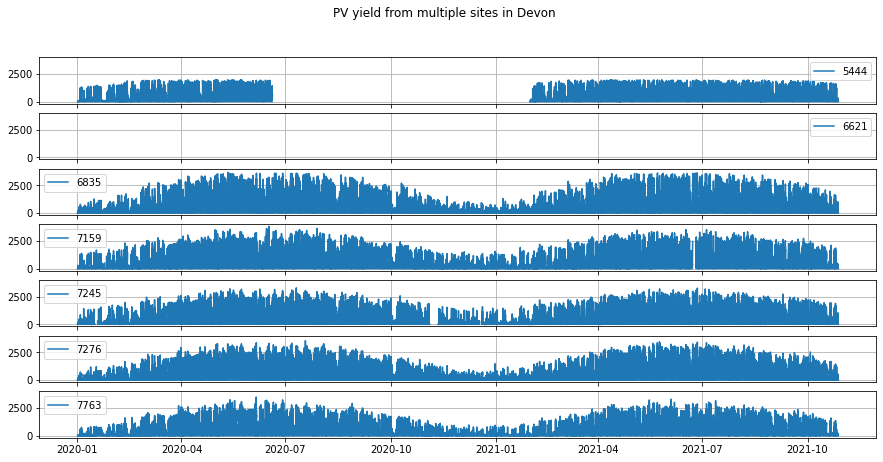

In [36]:

fig, axs = plt.subplots(7,1,figsize=(15,7), sharex=True, sharey=True)

for i in range(len(devon_ss_ids)):

    id = devon_ss_ids[i]

    on_pv_system = pv_power['{}'.format(id)].to_dataframe()
    on_pv_system = on_pv_system[on_pv_system.index < '2021-11-07']
    on_pv_system = on_pv_system[on_pv_system.index > '2020-01-01']

    axs[i].plot(on_pv_system, label=id)
    axs[i].legend()
    axs[i].grid(True)


#fig.tight_layout()
fig.suptitle('PV yield from multiple sites in Devon')
plt.savefig('devon_pv_yield_per_site.jpg')
plt.show()


In [37]:
# Dropping 6621 and 5444 as they have missing data

devon_ss_ids = devon_df.ss_id[:].values
devon_ss_ids = devon_ss_ids.tolist()
devon_ss_ids.remove(6621) # works in-place
devon_ss_ids.remove(5444) # works in-place

In [38]:
# Create a list of dataframes for each of the values

dataframes = []
for ss_id in devon_ss_ids:
    dataframes.append(pv_power['{}'.format(ss_id)].to_dataframe())

pv_df = pd.concat(dataframes, axis=1)
pv_df['Mean'] = pv_df.mean(axis=1)

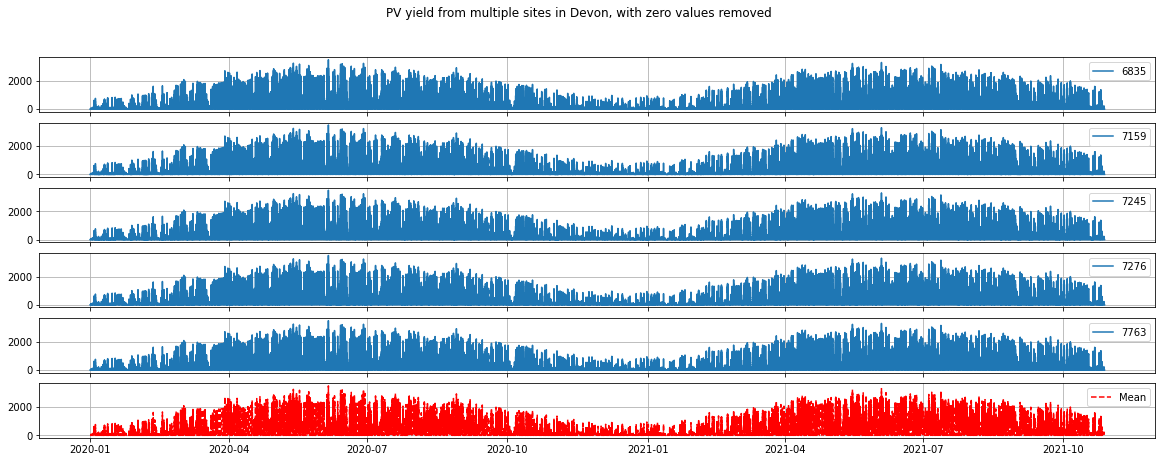

In [55]:
fig, axs = plt.subplots(6,1,figsize=(20,7), sharex=True, sharey=True)

for i in range(len(pv_df.columns)):
    
    pv_df[pv_df.columns[i]]
    
    if i < len(pv_df.columns)-1:
        axs[i].plot(on_pv_system, label=pv_df.columns[i])
    else:
        axs[i].plot(on_pv_system, '--', label=pv_df.columns[i], color='red')
    axs[i].legend()
    axs[i].grid(True)

fig.suptitle('PV yield from multiple sites in Devon, with zero values removed')
plt.savefig('devon_pv_yield_per_site_cleaned.jpg')
plt.show()

In [ ]:
pv_df.shape[1]

7

In [ ]:
pv_df.iloc[:,3]

datetime
2018-01-01 06:05:00    0.0
2018-01-01 06:10:00    0.0
2018-01-01 06:15:00    0.0
2018-01-01 06:20:00    0.0
2018-01-01 06:25:00    0.0
                      ... 
2021-10-27 23:35:00    0.0
2021-10-27 23:40:00    0.0
2021-10-27 23:45:00    0.0
2021-10-27 23:50:00    0.0
2021-10-27 23:55:00    0.0
Name: 7245, Length: 387254, dtype: float32

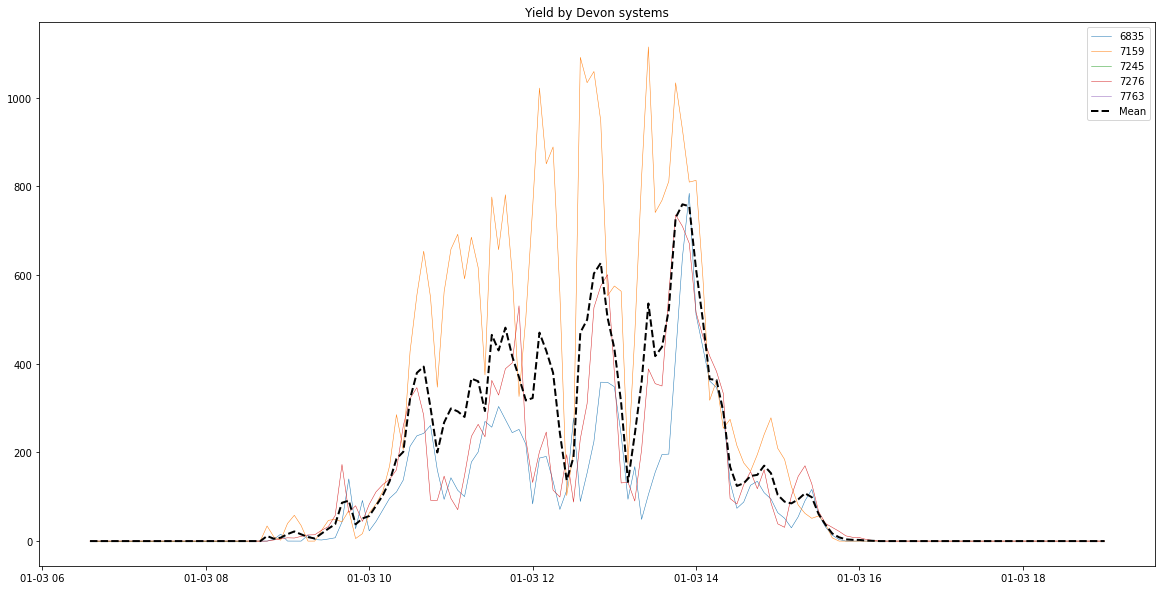

In [58]:

fig = plt.figure(figsize=(20,10))

pv_df_cropped = pv_df[330:480]

for i in range(pv_df_cropped.shape[1]-1):

    plt.plot(pv_df_cropped.iloc[:,i], label=pv_df_cropped.columns[i], linewidth=0.5)
    
plt.plot(pv_df_cropped.iloc[:,-1], "--", label='Mean', linewidth=2, color='black')

plt.legend()
plt.title('Yield by Devon systems');

#fig.legend();


In [61]:
devon_df

,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at
3039,5444,50.72,-3.50,E01019988,180.0,35.0,2.09,2012-05-18
4216,6621,50.80,-3.90,E01020326,180.0,30.0,3.99,2012-09-20
4430,6835,50.74,-4.00,E01020330,270.0,40.0,3.99,2012-10-10
4754,7159,50.64,-4.36,E01018949,160.0,32.0,3.92,2013-02-07
4840,7245,50.74,-4.01,E01020329,135.0,45.0,4.00,2013-02-18
4871,7276,50.77,-4.13,E01020322,180.0,30.0,3.92,2013-03-01
5358,7763,50.76,-4.46,E01018974,186.0,5.0,4.00,2013-08-21


In [63]:
devon_df.drop(devon_df.index[:2], inplace=True)

/tmp/ipykernel_26657/4133993823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devon_df.drop(devon_df.index[:2], inplace=True)


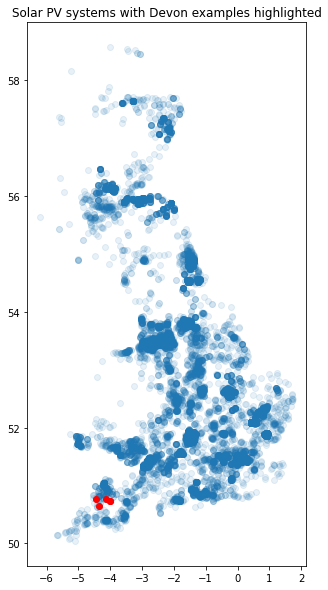

In [65]:
fig, ax = plt.subplots(figsize=(5,10))
ax.scatter(metadata_df.longitude_rounded, metadata_df.latitude_rounded, alpha=0.1)
ax.scatter(devon_df.longitude_rounded, devon_df.latitude_rounded, color='red')
plt.title("Solar PV systems with Devon examples highlighted");
plt.savefig('devon_pv_sites.jpg')

In [66]:
uk_shapefile = gpd.read_file('../OCF_docs/CTRY_DEC_2021_GB_BFC.shp').to_crs("epsg:4326")

In [68]:
devon_gdf = gpd.GeoDataFrame(devon_df, crs={'init':'epsg:4326'}, geometry=gpd.points_from_xy(devon_df.longitude_rounded, devon_df.latitude_rounded))

/home/ben/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


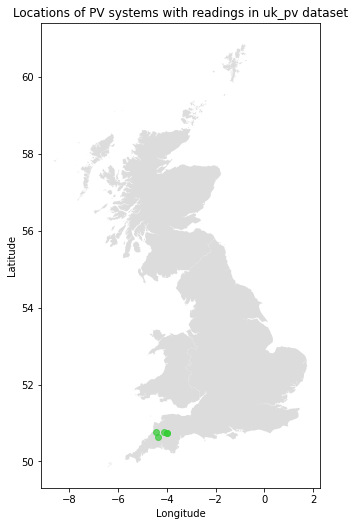

In [71]:
fig, ax = plt.subplots(figsize=(5,10))

uk_shapefile.plot(ax=ax, color='gainsboro')
devon_gdf.plot(ax=ax, color='limegreen', alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Locations of PV systems with readings in uk_pv dataset');

fig.savefig('uk_pv_locations_on_map.jpg')

In [78]:
devon_gdf

,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at,geometry
4430,6835,50.74,-4.00,E01020330,270.0,40.0,3.99,2012-10-10,POINT (-4.00000 50.74000)
4754,7159,50.64,-4.36,E01018949,160.0,32.0,3.92,2013-02-07,POINT (-4.36000 50.64000)
4840,7245,50.74,-4.01,E01020329,135.0,45.0,4.00,2013-02-18,POINT (-4.01000 50.74000)
4871,7276,50.77,-4.13,E01020322,180.0,30.0,3.92,2013-03-01,POINT (-4.13000 50.77000)
5358,7763,50.76,-4.46,E01018974,186.0,5.0,4.00,2013-08-21,POINT (-4.46000 50.76000)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


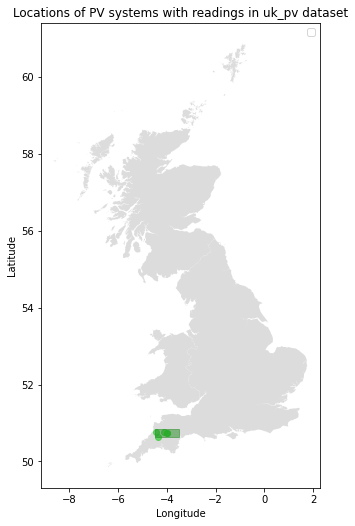

In [84]:
poly_coords = [
    (-4.5, 50.84), (-4.5, 50.64),
    (-3.5, 50.64), (-3.5, 50.84)
]

fig, ax = plt.subplots(figsize=(5,10))

uk_shapefile.plot(ax=ax, color='gainsboro')
devon_gdf.plot(ax=ax, color='limegreen', alpha=0.7)

ax.add_patch(
    plt.Polygon(poly_coords, color ='forestgreen',
                alpha = 0.5)
    )
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Locations of PV systems with readings in uk_pv dataset');


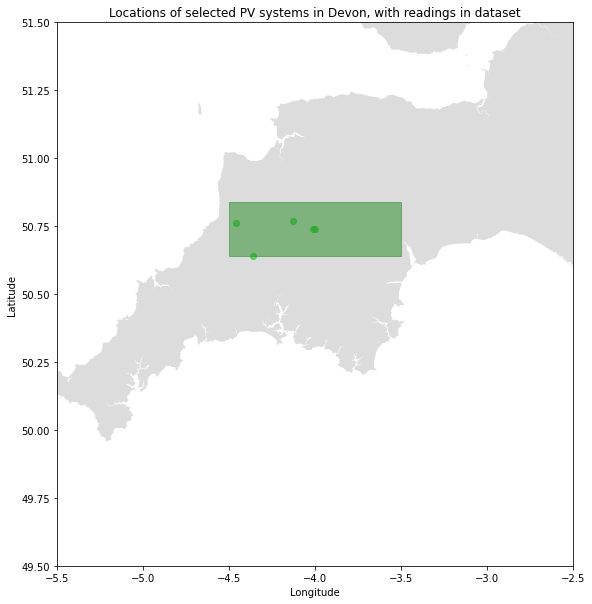

In [99]:
poly_coords = [
    (-4.5, 50.84), (-4.5, 50.64),
    (-3.5, 50.64), (-3.5, 50.84)
]

fig, ax = plt.subplots(figsize=(10,10))

uk_shapefile.plot(ax=ax, color='gainsboro')
devon_gdf.plot(ax=ax, color='limegreen', alpha=0.7)

ax.add_patch(
    plt.Polygon(poly_coords, color ='forestgreen',
                alpha = 0.5)
    )
plt.xlim([-5.5,-2.5])
plt.ylim([49.5, 51.5])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Two stations are very close to each other, there are 5 shown
plt.title('Locations of selected PV systems in Devon, with readings in dataset');


In [98]:
pv_df

,6835,7159,7245,7276,7763,Mean
datetime,,,,,,
2018-01-01 06:05:00,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 06:10:00,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 06:15:00,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 06:20:00,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 06:25:00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2021-10-27 23:35:00,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-27 23:40:00,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-27 23:45:00,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
# This was then saved to Colab in another document - https://colab.research.google.com/drive/1MpJV3tjpWxvbhCOFqXpPe4hbWzIvmsYk#scrollTo=BZEWY1KVykW0
# pv_df.to_pickle("/content/drive/My Drive/Colab Notebooks/dissertation/uk_pv/devon_pv_readings.pkl")
pv_df.to_pickle("../data/devon_pv_readings.pkl")